<a href="https://colab.research.google.com/github/poeroff/chlxodud04/blob/main/4%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

### Line-plot
Draw a line-plot for the age-specific height averages for men and women

- Men are represented in blue and women in red
- Use x_label() and y_label(), title(), and legend() to draw
- Use xticks() to separate the intervals on the x-axis graph

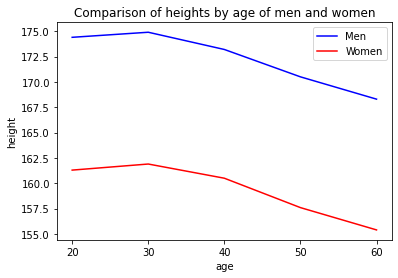

In [3]:
# Male Data
x = [20,30,40,50,60]
y = [174.4, 174.9, 173.2, 170.5, 168.3]

plt.plot(x,y,label="Men",color ="blue")

# Female Data
x = [20,30,40,50,60]
y = [161.3, 161.9, 160.5, 157.6, 155.4]

plt.plot(x,y,label="Women",color='red')

# Sepsarate x 
plt.xticks(np.arange(20,70,10))

# Draw
plt.xlabel("age")
plt.ylabel("height")
plt.title("Comparison of heights by age of men and women")
plt.legend()

plt.show()

###Histogram Plot
Draw the horsepower mean by type

- df_sample should contain only `Type` and `Horsepower` properties
- Drop the `NAN` value

In [4]:
df_sample = df[["Type","Horsepower"]]
df_sample

,Type,Horsepower
0,Small,140.0
1,Midsize,200.0
2,Compact,172.0
3,Midsize,172.0
4,Midsize,208.0
...,...,...
88,Van,109.0
89,Compact,134.0
90,Sporty,178.0
91,Compact,114.0


Returns all the number of times for each value in the `Type` 


In [5]:
df['Type'].value_counts()

Midsize    22
Small      20
Compact    16
Sporty     12
Large      11
Van         9
Name: Type, dtype: int64

### Bar plot
Use barh() to draw the average of the `horsepower' by `Type`

- Make a list named My_horsepowerList
- Use only Small, Midsize, Compact, Sporty, Large, and Van for Type

Text(0, 0.5, 'Type')

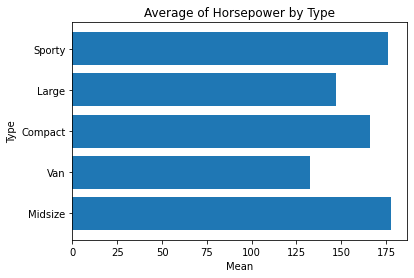

In [6]:
TypeList=list(set(df['Type'].dropna().values))

# Make List
My_HorsepowerList=[
   df_sample[df_sample["Type"] == "small"]["Horsepower"].mean(),
   df_sample[df_sample["Type"] == "Midsize"]["Horsepower"].mean(),
   df_sample[df_sample["Type"] == "Compact"]["Horsepower"].mean(),
   df_sample[df_sample["Type"] == "Sporty"]["Horsepower"].mean(),
   df_sample[df_sample["Type"] == "Van"]["Horsepower"].mean(),
   df_sample[df_sample["Type"] == "Large"]["Horsepower"].mean(),
]

# Draw plot

plt.barh(TypeList,My_HorsepowerList)
plt.title('Average of Horsepower by Type')
plt.xlabel('Mean')
plt.ylabel('Type')

### Pie Plot

Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method ).
Please give the `startangle` option to 30

- Use `autopct` to represent decimal places

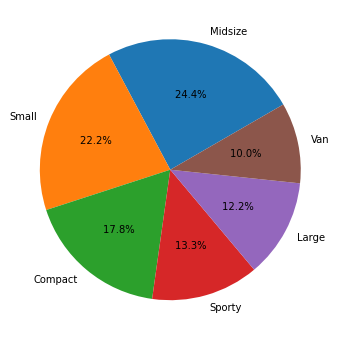

In [7]:
typeCount = df['Type'].value_counts(normalize=True)
# typeCount
fig, ax = plt.subplots(figsize=(6,6))

# Draw!!
ax.pie(
     typeCount,
      labels= typeCount.index,
       autopct= '%1.1f%% ',
       startangle = 30
    )


plt.show()

## Seaborn
Please refer the [official doc](https://seaborn.pydata.org/).

### Boxplot
Plot *boxplot* which comparing the `Price` according to `Manufacturer`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Blues` color palette


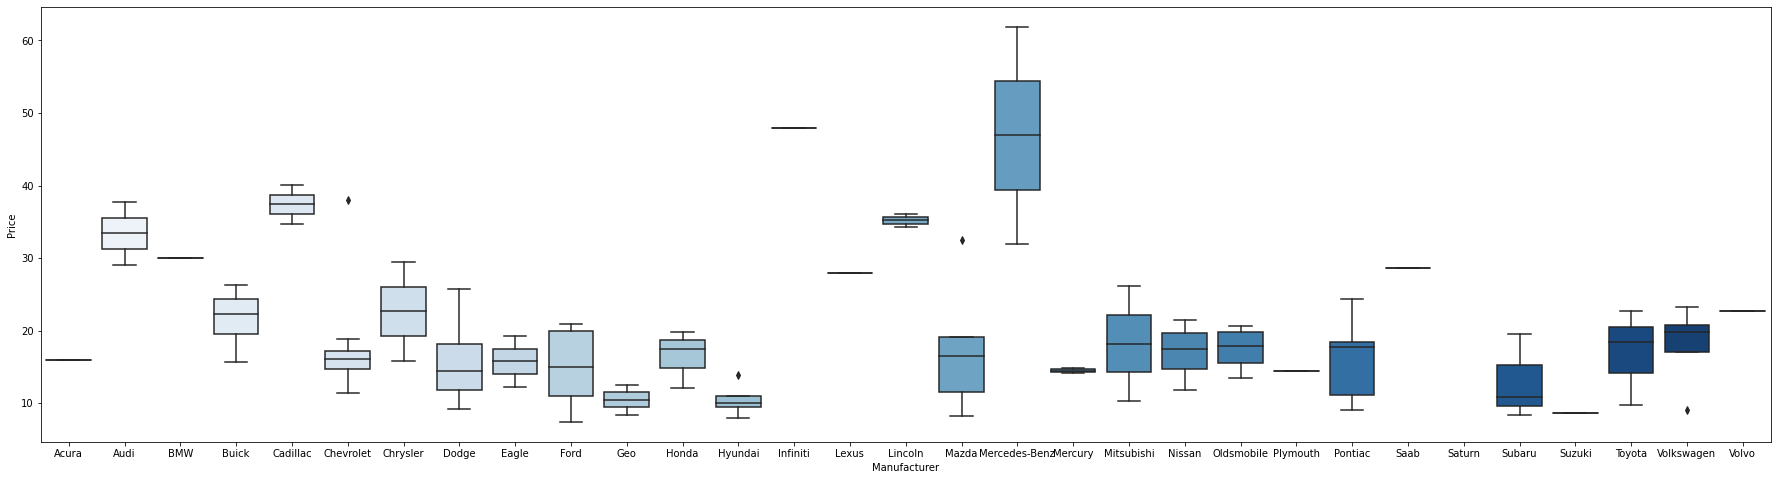

In [8]:
fig, ax = plt.subplots(figsize=(31,8))
sns.boxplot(
    data =  df,
    x="Manufacturer",
    y = "Price",
    palette="Blues"
)

plt.show()

## Heatmap and Pairplot
This part brought the correlation problem that was dealt with in the previous practice problem. Please refer `lecture3.ipynb`

- Select `Price`,`Horsepower`, `Passengers`, `Length`, `Weight`
- Put this in the `df`
- Use the `pearson` method to obtain the correlation value


In [9]:
targetVar = ["Price","Horsepower", "Passengers", "Length", "Weight"]
selectedDataFrame = df[targetVar]
corr = selectedDataFrame.corr(method="pearson")
corr

,Price,Horsepower,Passengers,Length,Weight
Price,1.000000,0.794607,0.040890,0.564704,0.642563
Horsepower,0.794607,1.000000,-0.039870,0.552906,0.777764
Passengers,0.040890,-0.039870,1.000000,0.473748,0.577401
Length,0.564704,0.552906,0.473748,1.000000,0.813305
Weight,0.642563,0.777764,0.577401,0.813305,1.000000


Make *heatmap*!
- Make it the `4th` decimal place
- Set the color to `bone_r`

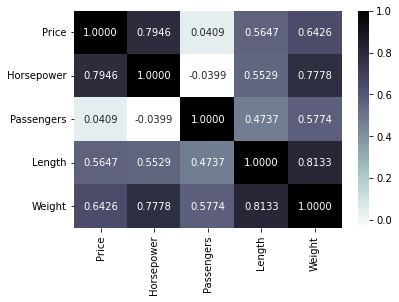

In [10]:
ax = sns.heatmap(corr,annot=True,fmt=".4f",cmap="bone_r")

Plot *pair plot*. The plot must satisify following conditions.

- Create a pair plot using the `targetvar` value above 
- Put the corr value in the pair plot in `text format`!

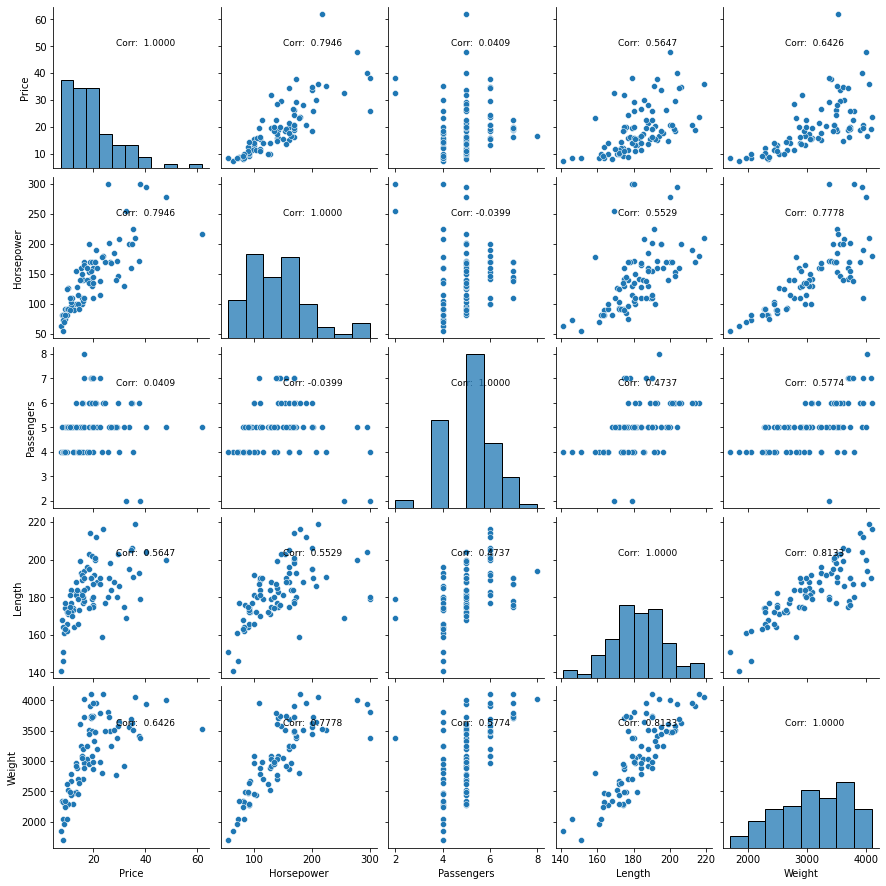

In [11]:
g = sns.pairplot(selectedDataFrame)

corrValue = corr.to_numpy()
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):
    ax.text(0.4,0.8,f"Corr: {cv: .4f}", fontsize =9,
    horizontalalignment="left",verticalalignment="top",
    transform=ax.transAxes)


plt.show()

# Plotly

### Density contour plot
Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable among `MPG.city`, `MPG.highway`, `Rev.per.mile`.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [12]:
# install packages
!pip install dash
!pip install jupyter_dash



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 7.7 MB/s 
     |████████████████████████████████| 357 kB 46.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=700da9d1db042bdb699e7bfec3aedaf9a1a6d55dc0ec5798e22da4ce6bae81b2
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [13]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = "dropdown",
                                               options=[
                                                        {'label': 'city','value':'MPG.city'},
                                                        {'label': 'highway','value':'MPG.highway'},
                                                        {'label': 'Rev','value':'Rev.per.mile'},
                                                        ],
                                              value = "MPG.city"),
                                            
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = px.density_contour(df,x = "price", y=df["{}".format(dropout_value)],
                             marigian_x="histogram",marigian_y = "histogram")

    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>

#TODO
이번에 할 데이터는 `NBA선수 데이터`와 `로또 데이터` 입니다! 

출발~~~!!!

## NBA data
아래에 보이는 데이터는 NBA선수 데이터 입니다!

선수들의 소속팀, 이름, 키, 몸무게, 시즌, 출신대학교 등등이있습니다.

In [14]:
df_players = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/all_seasons.csv')
df_players

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


### 1. scatter plot을 이용하여 선수들의 키와 몸무게 비교

색깔은 `#e377c2`색을 넣어주시면 됩니다. 마커는 `x`표시로 해주세요! 마커 투명도는 0.5로 주시면됩니다!

레이블과 타이틀또한 정답과 동일하게 해주세요!

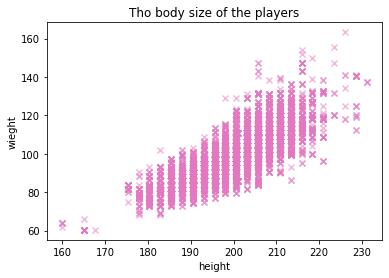

In [15]:
x = [df_players['player_height']]
y = [df_players['player_weight']]

########### Make Code ###########
plt.scatter(x,y,c='#e377c2',marker='x',alpha =0.5)
plt.xlabel("height")
plt.ylabel("wieght")
plt.title("Tho body size of the players")


plt.show()

### 2. plotly사용해보기!

plotly를 이용하여 선수들의 키와 몸무게(`player_height`와 `player_weight`)를 비교하고 마우스로 댔을때 player_name나오게 해주세요.  

또한 `pts`별 색깔도 적용해주세요!

In [16]:
fig = px.scatter(df_players,x="player_height",y='player_weight',color='pts',hover_data = ['player_name'])
fig.show()

### 3. 데이터 전처리

여기서서는 `Stephen Curry`선수의 데이터를 Curry_data에 저장해주세요!

In [17]:
Curry_data = df_players.groupby("player_name").get_group("Stephen Curry")
Curry_data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
5926,5926,Stephen Curry,GSW,22.0,190.50,83.91452,Davidson,USA,2009,1,...,17.5,4.5,5.9,-3.1,0.018,0.118,0.218,0.568,0.241,2009-10
6361,6361,Stephen Curry,GSW,23.0,190.50,83.91452,Davidson,USA,2009,1,...,18.6,3.9,5.8,-0.6,0.023,0.109,0.242,0.595,0.268,2010-11
6999,6999,Stephen Curry,GSW,24.0,190.50,83.91452,Davidson,USA,2009,1,...,14.7,3.4,5.3,5.4,0.023,0.111,0.235,0.605,0.295,2011-12
7173,7173,Stephen Curry,GSW,25.0,190.50,83.91452,Davidson,USA,2009,1,...,22.9,4.0,6.9,2.4,0.022,0.092,0.261,0.589,0.298,2012-13
7838,7838,Stephen Curry,GSW,26.0,190.50,83.91452,Davidson,USA,2009,1,...,24.0,4.3,8.5,9.4,0.018,0.108,0.281,0.610,0.372,2013-14
8292,8292,Stephen Curry,GSW,27.0,190.50,86.18248,Davidson,USA,2009,1,...,23.8,4.3,7.7,17.0,0.024,0.113,0.283,0.638,0.358,2014-15
8739,8739,Stephen Curry,GSW,28.0,190.50,86.18248,Davidson,USA,2009,1,...,30.1,5.4,6.7,18.3,0.029,0.131,0.320,0.669,0.315,2015-16
9182,9182,Stephen Curry,GSW,29.0,190.50,86.18248,Davidson,USA,2009,1,...,25.3,4.5,6.6,17.2,0.027,0.113,0.292,0.624,0.287,2016-17
9877,9877,Stephen Curry,GSW,30.0,190.50,86.18248,Davidson,USA,2009,1,...,26.4,5.1,6.1,13.0,0.024,0.124,0.290,0.675,0.272,2017-18
10141,10141,Stephen Curry,GSW,31.0,190.50,86.18248,Davidson,USA,2009,1,...,27.3,5.3,5.2,13.7,0.020,0.122,0.292,0.641,0.225,2018-19


### 4. LinePlot그려보기

`lineplot`을 이용하여 Stephen Curry선수의 시즌별 `pts`, `reb`, `ast`값 비교해보세요! 

아래그림처럼 plot을 그리면됩니다!

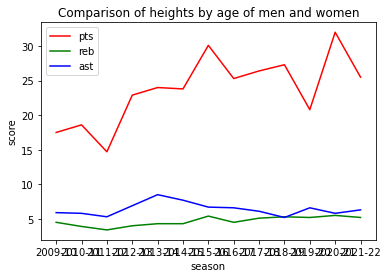

In [18]:
# pts 

x = Curry_data["season"]
y = Curry_data["pts"]

fig, ax =plt.subplots()
ax.plot(x,y,label="pts",color="red")




 # reb
x = Curry_data["season"]
y = Curry_data["reb"]
ax.plot(x,y,label="reb",color="green")


 #ast
x = Curry_data["season"]
y = Curry_data["ast"]
ax.plot(x,y,label="ast",color="blue")




########### Make ###########
ax.set_xlabel("season")
ax.set_ylabel("score")
ax.set_title("Comparison of heights by age of men and women")
ax.legend()


############################

plt.show()

### 5. Pie Plot그려보기!

2015-16 시즌 이상 시즌별 Curry의 득점률 비교하는 문제입니다!

- 색깔은 `mediumorchid`,`khaki`,`palegreen`,`deeppink`,`orange`,`teal`,`royalblue`을 조합해서 이용해주세요!
- 제일 득점률이 높은 시즌의 슬라이스를 분리해주세요!
- 참조 : [ref](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html),  [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*



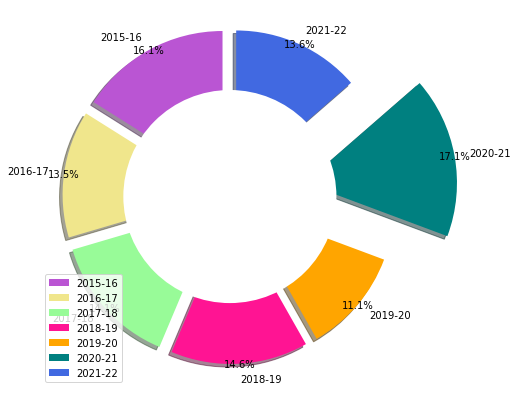

In [19]:
labels = Curry_data['season'].tail(7)
sizes = Curry_data['pts'].tail(7)
explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.1)
# typeCount
fig, ax = plt.subplots(figsize=(7,7))
colors = ['mediumorchid','khaki','palegreen','deeppink','orange','teal','royalblue']

plt.pie(sizes, explode=explode, labels = labels,colors = colors, startangle = 90, shadow = True, autopct ='%1.1f%%',pctdistance=1)
ax.legend()

#draw white circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()





## 로또 데이터
아래 데이터는 로또 데이터입니다! 2022-12-07부터 2021-04-24 날짜의 로또번호를 담고있습니다! 

In [20]:
df_lotto = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/DATA_Korean_Lotto_20021207-20210424.csv')
df_lotto

,lottery,date,num1,num2,num3,num4,num5,num6,bonus
0,1,2002-12-07,10,23,29,33,37,40,16
1,2,2002-12-14,9,13,21,25,32,42,2
2,3,2002-12-21,11,16,19,21,27,31,30
3,4,2002-12-28,14,27,30,31,40,42,2
4,5,2003-01-04,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...,...
955,956,2021-03-27,10,11,20,21,25,41,40
956,957,2021-04-03,4,15,24,35,36,40,1
957,958,2021-04-10,2,9,10,16,35,37,1
958,959,2021-04-17,1,14,15,24,40,41,35


### 6. 여러 subplot에 barplot을 이용하여 그리기
각각의 num에 어떤 숫자가 제일 많이 나왔는지 보기
- boxplot을 이용하여 여러 subplot들을 만들어 한번에 그려주세요!
- plot의 모든 x좌표 간격을 1칸씩으로 만들어주세요!
- 각각의 plot마다 title을 달아주세요!

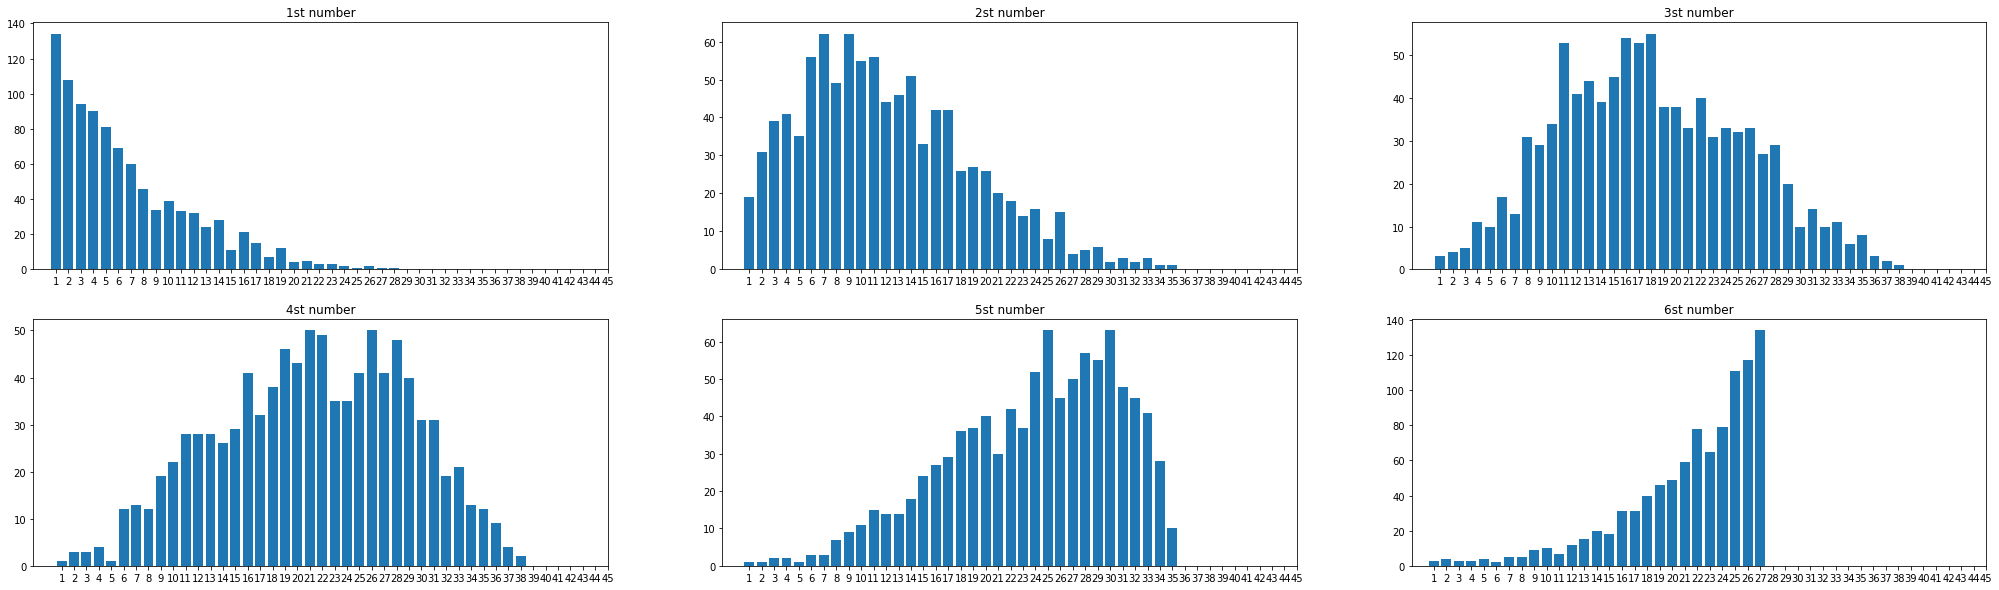

In [21]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches((35,10))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
num1 =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]

j =0
k =0

for i in range(1,7):
  if(k == 3):
    j = j+1
    k= 0
  bins = df_lotto['num{}'.format(i)].value_counts().sort_index()
  num =range(1,len(bins)+1);
  ax[j,k].set_title("{}st number".format(i))
  
  ax[j,k].bar(num,bins)
  k = k+1
ax[0,0].set_xticks(num1)  
ax[0,1].set_xticks(num1)
ax[0,2].set_xticks(num1)  
ax[1,0].set_xticks(num1)  
ax[1,1].set_xticks(num1)  
ax[1,2].set_xticks(num1)  
plt.show()
  
  
  



### [optional] 로또 번호의 보너스 숫자는 원하는 plot들을 이용하여 자유롭게 만들어 보세요!